<a href="https://colab.research.google.com/github/LlakmalGamage/CNN-SinhalaCharRecognition-Deep-Learning-Mini-Project-01/blob/main/Sinhala_Character_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
import cv2
import tensorflow as tf

Connect the Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
!ls /content/drive/

Mounted at /content/drive
MyDrive


In [3]:
train_dataset= '/content/drive/MyDrive/deep_learning_dataset/Training'

testing_dataset= '/content/drive/MyDrive/deep_learning_dataset/Testing'

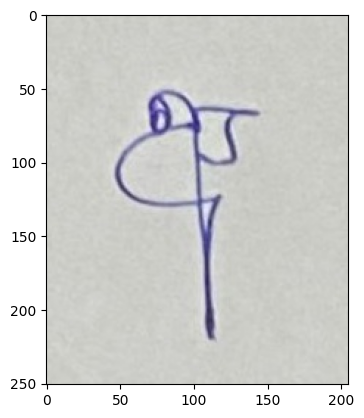

In [4]:

image_path = '/content/drive/MyDrive/deep_learning_dataset/Training/A/A_46.jpg'

# Check if the file exists
if not os.path.isfile(image_path):
    print(f"Error: The file '{image_path}' does not exist.")
else:
    # Read the image using cv2
    image = cv2.imread(image_path)

    # Display the image using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.show()

Found 80 images belonging to 2 classes.
Classes found in the dataset:
A
J


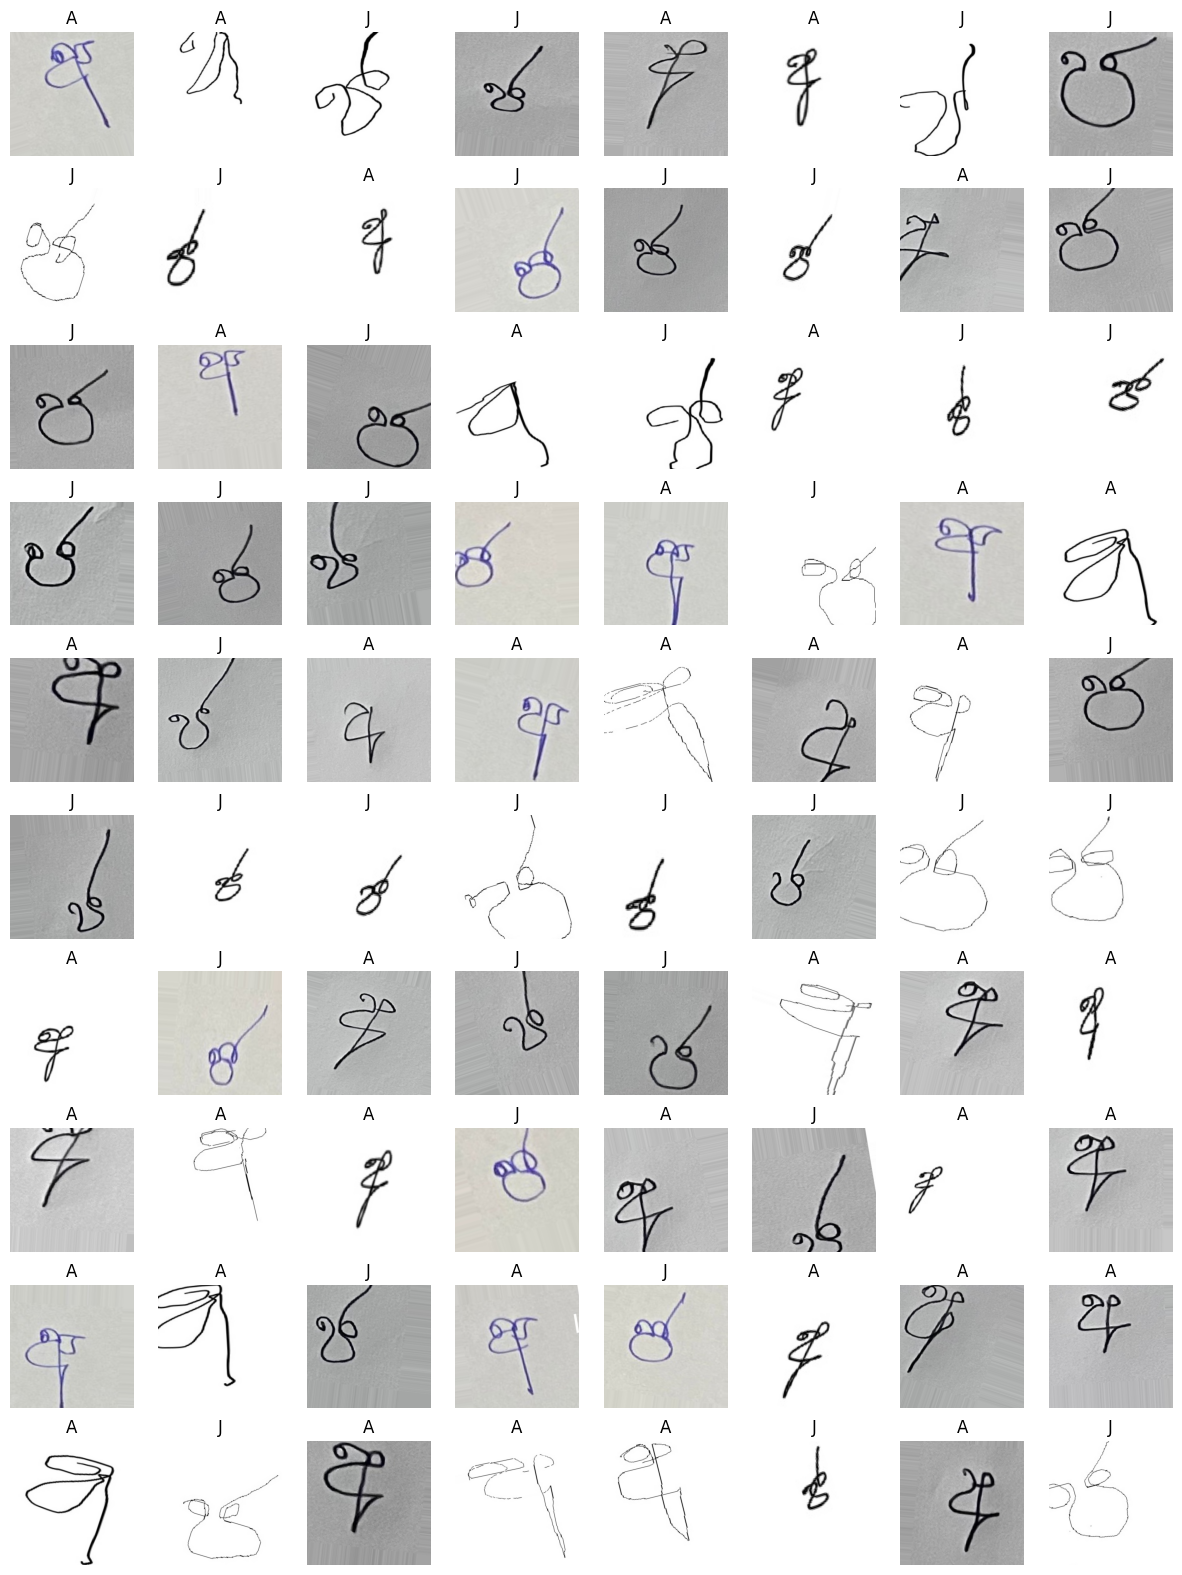

In [5]:


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/deep_learning_dataset/Training',
    target_size=(300, 300),
    batch_size=64,
    class_mode='binary',



)

class_names = list(train_generator.class_indices.keys())

# Printing class names
print("Classes found in the dataset:")
for class_name in class_names:
    print(class_name)



import matplotlib.pyplot as plt

# Set the number of images to display
num_images = 80

# Extract all images and labels from the generator
all_images = []
all_labels = []

for _ in range(num_images // 64 + 1):
    batch = train_generator.next()
    images, labels = batch
    all_images.extend(images)
    all_labels.extend(labels)

# Convert one-hot encoded labels to integers
class_labels = [int(label) for label in all_labels]

# Mapping class labels to actual class names
class_names_list = [class_names[label] for label in class_labels]

# Display all images with labels in a single plot
plt.figure(figsize=(15, 20))
for i in range(num_images):
    plt.subplot(10, 8, i + 1)
    plt.imshow(all_images[i])
    plt.title(class_names_list[i])
    plt.axis('off')

plt.show()

In [6]:
model = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (4, 4), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10)

Epoch 1/10
2/2 [==============================] - 29s 20s/step - loss: 2.9645 - accuracy: 0.4125
Epoch 2/10
2/2 [==============================] - 24s 4s/step - loss: 1.7641 - accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 25s 6s/step - loss: 0.6930 - accuracy: 0.5500
Epoch 4/10
2/2 [==============================] - 24s 4s/step - loss: 0.6952 - accuracy: 0.5125
Epoch 5/10
2/2 [==============================] - 25s 4s/step - loss: 0.6941 - accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 25s 18s/step - loss: 0.6843 - accuracy: 0.6625
Epoch 7/10
2/2 [==============================] - 25s 4s/step - loss: 0.6972 - accuracy: 0.5250
Epoch 8/10
2/2 [==============================] - 24s 17s/step - loss: 0.6938 - accuracy: 0.5500
Epoch 9/10
2/2 [==============================] - 25s 18s/step - loss: 0.7044 - accuracy: 0.4625
Epoch 10/10
2/2 [==============================] - 25s 18s/step - loss: 0.7037 - accuracy: 0.4500


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/deep_learning_dataset/Testing',
    target_size=(300, 300),
    batch_size=64,
    class_mode='binary',
    shuffle=False)

Found 20 images belonging to 2 classes.


In [9]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 [==============================] - 2s 2s/step - loss: 0.6924 - accuracy: 0.7000
Test Loss: 0.6924420595169067
Test Accuracy: 0.699999988079071
